In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Plotting library
from scipy.optimize import minimize # Optimization module in scipy
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat # will be used to load MATLAB mat datafile format

In [166]:
# Load matlab file to pandas dataframe
mat = loadmat('ex3data1.mat')

In [167]:
X, y = mat['X'], mat['y'].ravel()
y[ y == 10] = 0 # Since the dataset was used in MATLAB, 10 is found and this correspond to 0 in python
m = y.size

In [168]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [169]:
# Visualizing data
# Randomly select 100 data points to display
rand_sample = np.random.choice(m, 10, replace=False)
rand_sample

array([4775, 3755, 1621, 2568,   39, 3952, 4767, 2052, 1537,  171])

(-0.5, 199.5, 19.5, -0.5)

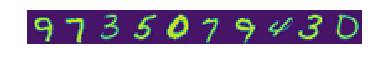

In [170]:
select = X[rand_sample, :]
plt.imshow(select.reshape(-1, 20).T)
plt.axis('off')

## Vectorized logistic regression

In [171]:
# Define sigmoid function
def sigmoid(z):
        g = 1/ (1 + np.exp(-z))
        return g

In [172]:
# using vectorized approach for unregularized logistic regression
def costFunction(theta, X, y, lambda_):
    
    h = sigmoid(np.dot(X, theta.T))
    J = (1/m) * (np.dot(-y, np.log(h)) - (np.dot((1-y), np.log(1-h)))) # Cost function
    grad = (1/m) * np.dot(X.T, (h-y))
    
    return J, grad

In [173]:
# Using vectorized approach for regularized logistic regression
def costFunctionReg(theta, X, y, lambda_):
    
    m= len(y)
    grad = np.zeros(X.shape[1])
    h = sigmoid(np.dot(X, theta.T))
    J = ((1/m) * (np.dot(-y, np.log(h)) - (np.dot((1-y), np.log(1-h))))) + ((lambda_/(2*m)) * np.sum(theta[1:] ** 2))
    grad[0] = (1/m) * np.dot(X[:,0], (h-y))
    grad[1:] = ((1/m) * np.dot(X[:,1:].T, (h-y))) + ((lambda_/m) * theta[1:])
    
    return J, grad 

In [174]:
X = np.concatenate((np.ones((m,1)), X), axis=1)
lambda_ = 0.1
theta = np.zeros(X.shape[1])
cost, grad = costFunctionReg(theta, X, y, lambda_)

In [175]:
grad.shape

(401,)

In [176]:
# Using vectorized approach to gradient descent for logistic regression
#def gradientReg(theta, X, y, lambda_):
    
    #m = len(y)
    #grad = np.zeros(X.shape[1])
    #h = sigmoid(np.dot(X, theta.T))
    #grad[0] = (1/m) * np.dot(X[:,0], (h-y))
    #grad[1:] = ((1/m) * np.dot(X[:,1:].T, (h-y))) + ((lambda_/m) * theta[1:])
    
    #return grad

In [177]:
X.shape

(5000, 401)

### One-vs-all Classification

In [178]:
def oneVsAll(X, y, lambda_, num_labels):
    all_theta = np.zeros((num_labels, X.shape[1]))
    for i in range(num_labels):
        res = minimize(costFunctionReg, theta, (X, ((y == i)*1), lambda_), method='CG', jac=True, options={'maxiter': 50})
        all_theta[i, :] = res.x 
        
    return  all_theta   

In [179]:
theta = np.zeros(X.shape[1])

all_theta = oneVsAll(X, y, 0.1, 10)

In [186]:
all_theta

array([[-8.92879350e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.74831715e-04,  2.12763890e-05,  0.00000000e+00],
       [-3.09903982e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.99084101e-03,  1.46459947e-07,  0.00000000e+00],
       [-3.15546984e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.90399335e-03, -6.74800282e-04,  0.00000000e+00],
       ...,
       [-2.17636089e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.71607044e-04,  9.54525911e-05,  0.00000000e+00],
       [-8.91969501e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.21199093e-04,  1.16387593e-05,  0.00000000e+00],
       [-4.77585723e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.12679609e-03,  8.70544364e-05,  0.00000000e+00]])

In [187]:
all_theta.shape

(10, 401)

### One-vs-all Prediction

In [188]:
def predictOneVsAll(all_theta, X):
    
    p = sigmoid(np.dot(X, all_theta.T))
    
    return np.argmax(p, axis=1)+1

In [189]:
p = predictOneVsAll(all_theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))   

Train Accuracy: 0.52 %


# Neural network

In [190]:
mat = loadmat('ex3data1.mat')
X, y = mat['X'], mat['y'].ravel()
y[ y == 10] = 0 # Since the dataset was used in MATLAB, 10 is found and this correspond to 0 in python
m = y.size

In [191]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 

In [192]:
# Load the .mat file, which returns a dictionary 
weights = loadmat('ex3weights.mat')
weights

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [193]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [194]:
theta1.shape

(25, 401)

In [195]:
theta2.shape

(10, 26)

In [196]:
theta2

array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
        -2.20823629,  0.56383834,  1.21105294,  2.21030997,  0.44456156,
        -1.18244872,  1.04289112, -1.60558756,  1.30419943,  1.37175046,
         1.74825095, -0.23365648, -1.52014483,  1.15324176,  0.10368082,
        -0.37207719, -0.61530019, -0.1256836 , -2.27193038, -0.71836208,
        -1.29690315],
       [-0.61785176,  0.61559207, -1.26550639,  1.85745418, -0.91853319,
        -0.05502589, -0.38589806,  1.29520853, -1.56843297, -0.97026419,
        -2.18334895, -2.85033578, -2.07733086,  1.63163164,  0.3490229 ,
         1.82789117, -2.44174379, -0.8563034 , -0.2982564 , -2.07947873,
        -1.2933238 ,  0.89982032,  0.28306578,  2.31180525, -2.46444086,
         1.45656548],
       [-0.68934072, -1.94538151,  2.01360618, -3.12316188, -0.2361763 ,
         1.38680947,  0.90982429, -1.54774416, -0.79830896, -0.65599834,
         0.7353833 , -2.58593294,  0.47210839,  0.55349499,  2.51255453,
       

In [197]:
# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing

In [198]:
X.shape

(5000, 400)

In [199]:
X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

In [200]:
X.shape

(5000, 401)

In [201]:
theta1.shape

(25, 401)

In [202]:
theta2.shape

(10, 26)

In [155]:
z2 = np.dot(X, theta1.T)

In [157]:
a2.shape

(5000, 25)

In [208]:
def predict(theta1, theta2, X):
    z2 = np.dot(X, theta1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((a2.shape[0],1)), a2), axis=1) # add bias unit layer 2
    z3 = np.dot(a2, theta2.T)
    a3 = sigmoid(z3)
    
    return (np.argmax(a3, axis=1)+1) 

In [209]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y)*100))

Training set accuracy: 87.6 %


In [205]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)